# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** M. Rafli Azriansyah
- **Email:** m.rafli.azriansyah@gmail.com
- **ID Dicoding:** azrirafli03

## Menentukan Pertanyaan Bisnis

* Bagaimana evaluasi terhadap kinerja peminjaman sepeda sepanjang periode 2011 hingga 2012?
* Berapa persentase peminjam sepeda yang terdaftar sebagai pelanggan terdaftar dan peminjam non-pelanggan?
* Dalam konteks total peminjaman sepeda tertinggi selama dua tahun tersebut, kondisi dan situasi apa yang dapat diidentifikasi sebagai faktor pendorong utama?

## Instalasi dan Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

Bike Sharing Dataset terdiri dari 2 dataset, yaitu day.csv dan hour.csv. Oleh karena itu, kita akan mengambil atau mengubah kedua hal tersebut menjadi bentuk dataframe menggunakan library pandas. Ini adalah tahap Pertama, yaitu mengambil data dan menjadikannya sebagai bentuk dataframe.

* Day Dataset (Dataset per hari)

In [ ]:
day_df = pd.read_csv("drive/MyDrive/proyekAnalisisDataAzri/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


* Hour Dataset (Dataset sebagai Jam)

In [ ]:
hour_df = pd.read_csv("drive/MyDrive/proyekAnalisisDataAzri/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Dataset harus dicek terlebih dahulu, apakah sangat layak untuk masuk ke tahap analisis. Jika belum layak (Terdapat kejanggalan), maka dataset harus dibersihkan terlebih dahulu. Sebelum dibersihkan, yaitu dilakukan pengecekan atau penilaian pada tahap kedua yang disebut Assessing Data.

* Day Dataframe

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


* Hour Dataframe

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**


*   Dataframe day_df yang diambil dari day.csv & dataframe hour_df dari hour.csv, tidak memiliki null value dan duplikat.
*   Kedua dataframe tersebut, yaitu day_df dan hour_df memiliki kesalahan tipe data pada kolom 'dteday' yang seharusnya adalah tipe 'date' bukan 'object'.

### Cleaning Data

Ini adalah tahap ketiga, yaitu cleaning data. Setelah mendapatkan informasi bahwa terdapat kesalahan tipe data pada kolom 'dteday' pada kedua day_df dan hour_df, kita akan mengubah tipe data pada kolom tersebut menjadi tipe data 'datetime'.

* Day Dataframe

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

* Hour Dataframe

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**



*   Setelah mengubah tipe data menjadi datetime, kita dapat melihatnya dengan menggunakan method info(). Bisa dilihat pada bagian 'Dtype', kolom 'dteday' berubah menjadi tulisan 'datetime64[ns]'


## Exploratory Data Analysis (EDA)

### Explore Data

Berlanjut ke dalam tahapan EDA. EDA adalah tahap eksplorasi data yang telah dibersihkan guna memperoleh insight dan menjawab pertanyaan analisis. Kita akan melakukan nya pada proses di bawah ini.

In [ ]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [ ]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [ ]:
hour_df.groupby(by="season").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

dteday  cnt                            
       nunique  max min        mean         std
season                                         
1          181  801   1  111.114569  119.224010
2          184  957   1  208.344069  188.362473
3          188  977   1  236.016237  197.711630
4          178  967   1  198.868856  182.967972

In [ ]:
hour_df.groupby(by="weathersit").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

dteday  cnt                            
           nunique  max min        mean         std
weathersit                                         
1              700  977   1  204.869272  189.487773
2              567  957   1  175.165493  165.431589
3              300  891   1  111.579281  133.781045
4                3  164  23   74.333333   77.925178

In [ ]:
hour_df.groupby(by="hr").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

dteday  cnt                            
   nunique  max min        mean         std
hr                                         
0      726  283   2   53.898072   42.307910
1      724  168   1   33.375691   33.538727
2      715  132   1   22.869930   26.578642
3      697   79   1   11.727403   13.239190
4      697   28   1    6.352941    4.143818
5      717   66   1   19.889819   13.200765
6      725  213   1   76.044138   55.084348
7      727  596   1  212.064649  161.441936
8      727  839   5  359.011004  235.189285
9      727  426  14  219.309491   93.703458
10     727  539   8  173.668501  102.205413
11     727  663  10  208.143054  127.495536
12     728  776   3  253.315934  145.081134
13     729  760  11  253.661180  148.107657
14     729  750  12  240.949246  147.271574
15     729  750   7  251.233196  144.632541
16     730  783  11  311.983562  148.682618
17     730  976  15  461.452055  232.656611
18     728  977  23  425.510989  224.639304
19     728  743  11  311.523352  161.050359
20     728  567  11  226.030220  119.670164
21     728  584   6  172.314560   89.788893
22     728  502   9  131.335165   69.937782
23     728  256   2   87.831044   50.846889

**Insight:**


Setelah melakukan beberapa percobaan eksplorasi data, maka:

* Dapat dilihat data peminjaman sepeda dari 2011 hingga 2012 bahwa jumlah peminjam sepeda paling sedikit dalam satu hari adalah 22 orang, sedangkan jumlah peminjam sepeda terbanyak dalam satu hari adalah 8714 orang dengan standar deviasinya sebesar 1937.211452.
* Dapat dilihat data peminjaman sepeda sejak 2011 hingga 2012 bahwa jumlah peminjam sepeda paling sedikit dalam satu jam adalah 1 orang, sedangkan jumlah peminjam sepeda terbanyak dalam satu jam adalah 977 orang dengan standar deviasinya sebesar 181.387599.
* Berdasarkan output tersebut dapat disimpulkan bahwa pada tahun 2011 hingga 2012, rata rata peminjaman sepeda tertinggi ada pada Musim Gugur dan terendah pada Musim Semi.
* Berdasarkan output tersebut pada tahun 2011 hingga 2012, cuaca pada hari dengan rata rata peminjaman sepeda tertinggi ada pada cuaca cerah dan agak berawan dan terendah pada hari dengan hujan, bersalju, petir, dan badai.
* Waktu yang memiliki rata rata peminjaman sepeda tertinggi adalah pada pukul 5 p.m., 6 p.m., dan 8 p.m. Sedangkan waktu dengan rata rata peminjaman sepeda terendah adalah pada pukul 4 a.m., 3 a.m. dan 2 a.m. Hal ini menunjukkan peminjam sepeda meningkat di sore menjelang malam hari dan menurun pada dini hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana evaluasi terhadap kinerja peminjaman sepeda sepanjang periode 2011 hingga 2012?


In [ ]:
# Copy hour_df
main_df = hour_df.copy()

# Convert angka menjadi lebih mudah dipahami data aslinya, misalkan 1 menjadi January pada kolom mnth. Kita gunakan dictionary
yr = {0: '2011', 1: '2012'}
mnth = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
season = {1:'Spring', 2: 'Summer', 3:'Fall', 4:'Winter'}
weathersit = {1:'Clear', 2: 'Cloudy', 3:'Light Snow/Rain', 4:'Heavy Rain/Ice Pallets'}

# Melakukan mapping untuk mengubah nilai kolom sesuai ketentuan mapping pada variabel di atas
main_df['yr'] = main_df['yr'].map(yr)
main_df['mnth'] = main_df['mnth'].map(mnth)
main_df['weekday'] = main_df['dteday'].dt.day_name()
main_df['season'] = main_df['season'].map(season)
main_df['weathersit'] = main_df['weathersit'].map(weathersit)

# mengambil data utama atau yang paling penting pada dataframe tersebut
main_df = main_df[['dteday', 'yr', 'mnth', 'hr', 'weekday', 'season', 'weathersit','cnt', 'registered', 'casual']]

print(main_df)

          dteday    yr      mnth  hr   weekday  season weathersit  cnt  \
0     2011-01-01  2011   January   0  Saturday  Spring      Clear   16   
1     2011-01-01  2011   January   1  Saturday  Spring      Clear   40   
2     2011-01-01  2011   January   2  Saturday  Spring      Clear   32   
3     2011-01-01  2011   January   3  Saturday  Spring      Clear   13   
4     2011-01-01  2011   January   4  Saturday  Spring      Clear    1   
...          ...   ...       ...  ..       ...     ...        ...  ...   
17374 2012-12-31  2012  December  19    Monday  Spring     Cloudy  119   
17375 2012-12-31  2012  December  20    Monday  Spring     Cloudy   89   
17376 2012-12-31  2012  December  21    Monday  Spring      Clear   90   
17377 2012-12-31  2012  December  22    Monday  Spring      Clear   61   
17378 2012-12-31  2012  December  23    Monday  Spring      Clear   49   

       registered  casual  
0              13       3  
1              32       8  
2              27       5  

In [ ]:
# Proses pengelompokan dan penjumlahan, langsung mengatur ulang kolom sesuai kebutuhan.
monthly_rentals = (
    main_df.groupby(['yr', 'mnth'], as_index=False)[['cnt', 'registered', 'casual']]
    .sum()[['yr', 'mnth', 'cnt', 'registered', 'casual']]
)

# Menampilkan hasil akhir
print(monthly_rentals)

      yr       mnth     cnt  registered  casual
0   2011      April   94870       72524   22346
1   2011     August  136691      107849   28842
2   2011   December   87323       78875    8448
3   2011   February   48215       41973    6242
4   2011    January   38189       35116    3073
5   2011       July  141341      104889   36452
6   2011       June  143512      112900   30612
7   2011      March   64045       51219   12826
8   2011        May  135821      104771   31050
9   2011   November  102167       86573   15594
10  2011    October  123511       98289   25222
11  2011  September  127418      100873   26545
12  2012      April  174224      135768   38456
13  2012     August  214503      171306   43197
14  2012   December  123713      110468   13245
15  2012   February  103137       94416    8721
16  2012    January   96744       87775    8969
17  2012       July  203607      161902   41705
18  2012       June  202830      159536   43294
19  2012      March  164875      133257 

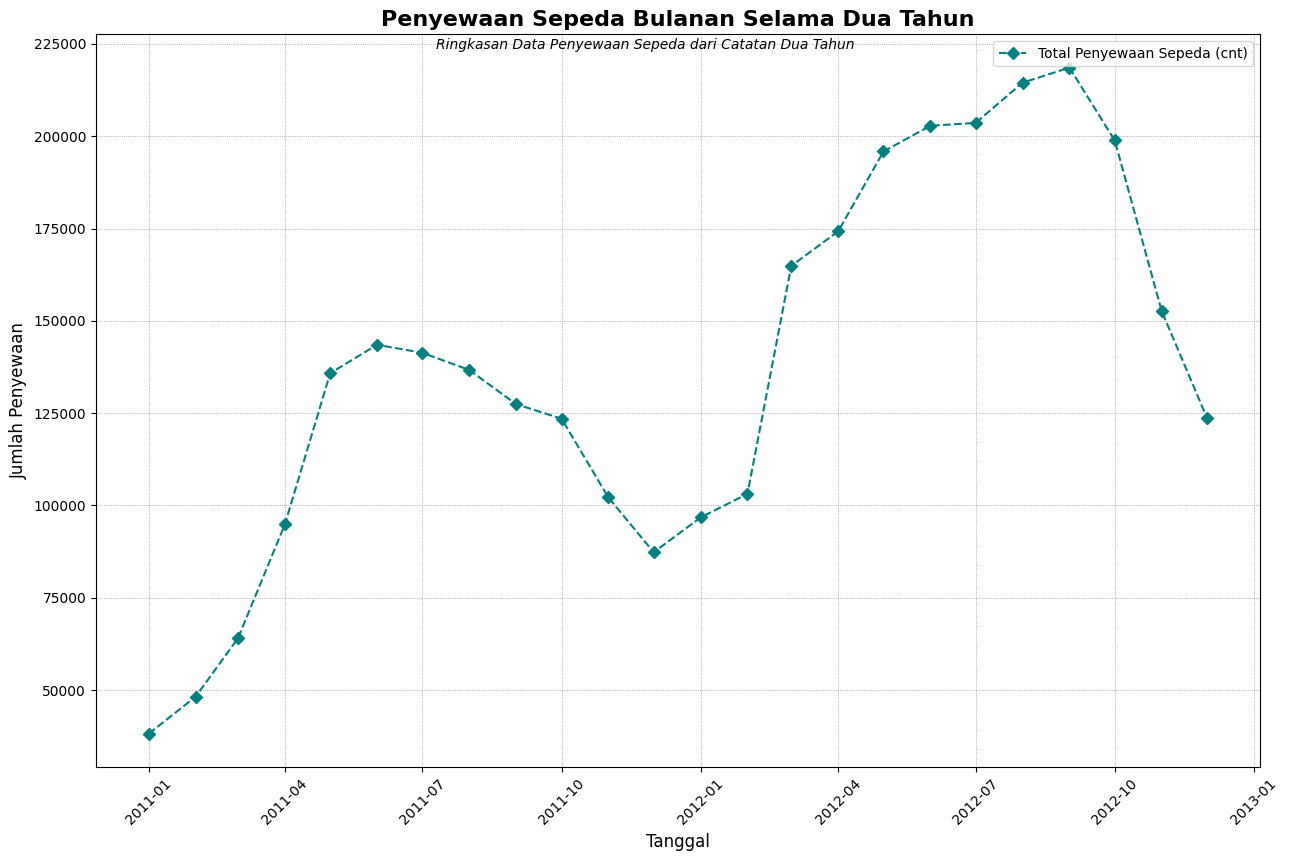

In [ ]:
# Membuat plot dengan desain visualisasi yang dimodifikasi.
plt.figure(figsize=(13, 9))  # Menyesuaikan ukuran grafik (sedikit lebih lebar).

plt.plot(
    monthly_rentals['date'],
    monthly_rentals['cnt'],
    linestyle='--',  # Mengubah gaya garis menjadi putus-putus.
    marker='D',  # Mengganti marker ke bentuk belah ketupat.
    label='Total Penyewaan Sepeda (cnt)',
    color='teal'  # Mengubah warna garis ke hijau teal.
)

# Menambahkan judul, label sumbu, dan subtitle untuk konteks tambahan.
plt.title('Penyewaan Sepeda Bulanan Selama Dua Tahun', fontsize=16, fontweight='bold')
plt.suptitle('Ringkasan Data Penyewaan Sepeda dari Catatan Dua Tahun', fontsize=10, style='italic', y=0.92)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)

# Menambahkan legenda dan memindahkannya ke lokasi terbaik.
plt.legend(loc='best', fontsize=10)

# Memperbaiki tampilan sumbu X dengan label format tanggal.
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Mengubah gaya grid agar lebih lembut.
plt.grid(color='gray', linestyle=':', linewidth=0.5)

# Menambahkan batas margin untuk grafik.
plt.tight_layout()

# Menampilkan grafik.
plt.show()


**Insight:**

* Performa peminjaman sepeda selama 2011 menunjukkan peningkatan pada kuartal pertama, disusul lonjakan signifikan di kuartal kedua. Namun, terjadi penurunan bertahap sejak kuartal ketiga hingga kuartal keempat, dengan penurunan lebih tajam di akhir tahun.
* Pada 2012, peminjaman meningkat signifikan di akhir kuartal pertama, berlanjut hingga kuartal ketiga, sebelum kembali menurun pada kuartal keempat.
* Secara keseluruhan, grafik menunjukkan tren peningkatan yang positif.



### Pertanyaan 2:

Berapa persentase peminjam sepeda yang terdaftar sebagai pelanggan terdaftar dan peminjam non-pelanggan?

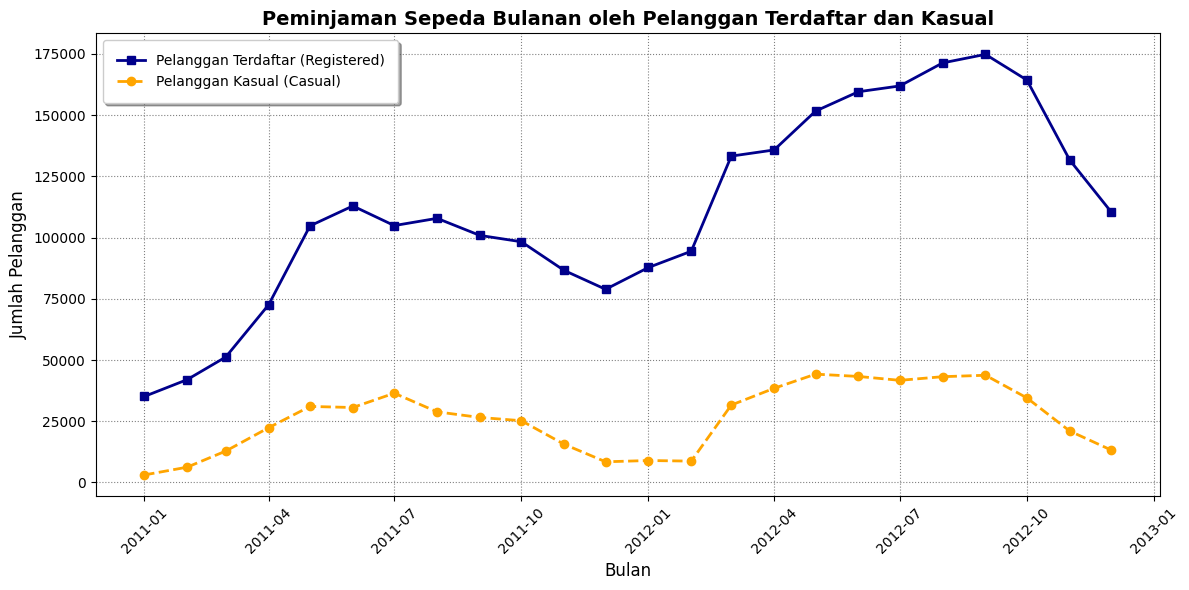

In [ ]:
# Membuat plot dengan desain visualisasi yang dimodifikasi.
plt.figure(figsize=(12, 6))  # Menyesuaikan ukuran grafik.

# Menambahkan dua garis dengan gaya yang berbeda untuk pelanggan terdaftar dan kasual.
plt.plot(
    monthly_rentals['date'],
    monthly_rentals['registered'],
    linestyle='-',  # Garis solid untuk pelanggan terdaftar.
    marker='s',  # Marker berbentuk kotak untuk titik data.
    label='Pelanggan Terdaftar (Registered)',
    color='darkblue',  # Warna garis biru tua.
    linewidth=2  # Ketebalan garis.
)

plt.plot(
    monthly_rentals['date'],
    monthly_rentals['casual'],
    linestyle='--',  # Garis putus-putus untuk pelanggan kasual.
    marker='o',  # Marker berbentuk lingkaran.
    label='Pelanggan Kasual (Casual)',
    color='orange',  # Warna garis oranye.
    linewidth=2  # Ketebalan garis.
)

# Menambahkan judul dan label sumbu dengan bahasa Indonesia.
plt.title('Peminjaman Sepeda Bulanan oleh Pelanggan Terdaftar dan Kasual', fontsize=14, fontweight='bold')
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)

# Menambahkan legenda dengan format dan posisi lebih rapi.
plt.legend(loc='upper left', fontsize=10, frameon=True, shadow=True, borderpad=1)

# Menyesuaikan tampilan label sumbu X.
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Menambahkan grid dengan gaya lembut untuk mempermudah pembacaan.
plt.grid(color='gray', linestyle=':', linewidth=0.8)

# Menambahkan batas margin dan tata letak rapi.
plt.tight_layout()

# Menampilkan grafik.
plt.show()


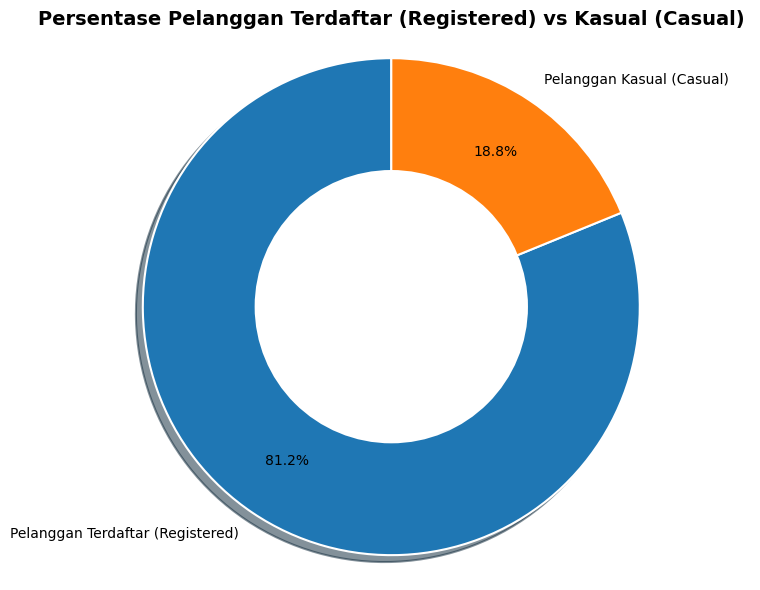

In [ ]:
# Menghitung total pelanggan terdaftar dan kasual.
total_registered = main_df['registered'].sum()
total_casual = main_df['casual'].sum()

# Menentukan label, ukuran, dan warna.
labels = ['Pelanggan Terdaftar (Registered)', 'Pelanggan Kasual (Casual)']
sizes = [total_registered, total_casual]
colors = ['#1f77b4', '#ff7f0e']  # Menggunakan warna biru tua dan oranye.

# Membuat pie chart dengan desain lebih menarik.
plt.figure(figsize=(8, 6))

# Membuat pie chart dengan efek "donut" dan bayangan.
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,  # Mulai dari atas.
    pctdistance=0.75,  # Jarak persentase dari tengah.
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},  # Tambahkan outline putih.
    textprops={'fontsize': 10},  # Ukuran font label.
    shadow=True  # Tambahkan bayangan untuk efek 3D.
)

# Menambahkan lingkaran tengah untuk menciptakan efek donut.
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
plt.gca().add_artist(centre_circle)

# Membuat layout grafik seimbang.
plt.axis('equal')  # Pastikan pie chart berbentuk lingkaran.
plt.title('Persentase Pelanggan Terdaftar (Registered) vs Kasual (Casual)', fontsize=14, fontweight='bold')

# Menyesuaikan posisi dan ukuran otomatis.
plt.tight_layout()

# Menampilkan grafik.
plt.show()


**Insight:**


* Peminjaman sepeda didominasi oleh pelanggan terdaftar, yang mencakup 81,2% dari total peminjaman selama dua tahun. Sebaliknya, pelanggan kasual hanya berkontribusi kurang dari 20%, menunjukkan preferensi yang signifikan terhadap penggunaan layanan oleh pelanggan tetap.

### Pertanyaan 3:

Dalam konteks total peminjaman sepeda tertinggi selama dua tahun tersebut, kondisi dan situasi apa yang dapat diidentifikasi sebagai faktor pendorong utama?

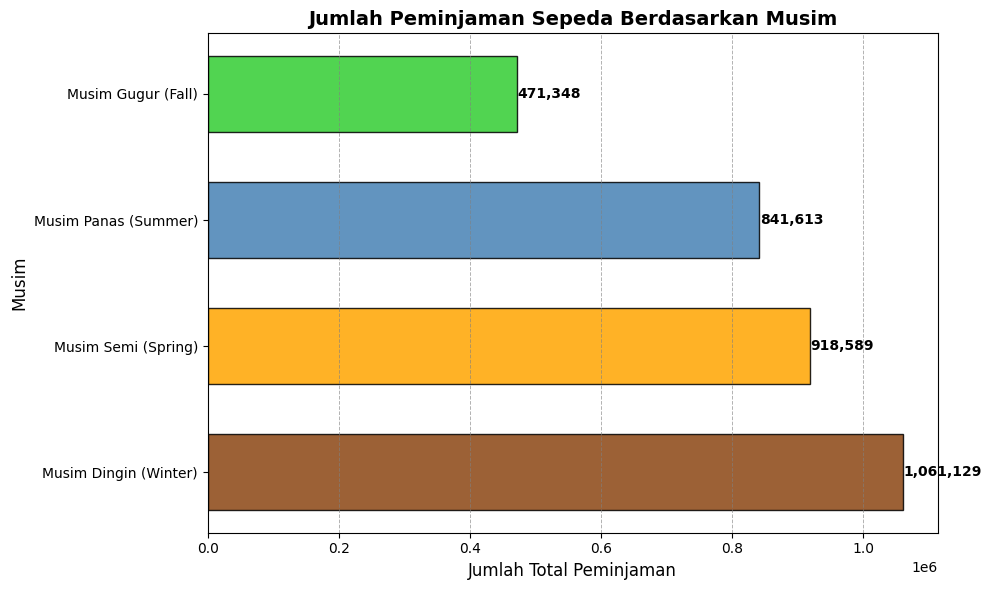

In [ ]:
# Menghitung total penyewaan berdasarkan musim.
seasonal_counts = main_df.groupby('season').cnt.sum().sort_values(ascending=False)

# Menentukan warna baru untuk setiap musim.
season_colors = {
    'Winter': '#4682B4',  # Biru baja untuk musim dingin.
    'Spring': '#32CD32',  # Hijau limau untuk musim semi.
    'Summer': '#FFA500',  # Oranye terang untuk musim panas.
    'Fall': '#8B4513'     # Coklat tua untuk musim gugur.
}

# Data ukuran dan label dalam bahasa Indonesia.
sizes = seasonal_counts.values
labels = ['Musim Dingin (Winter)', 'Musim Semi (Spring)', 'Musim Panas (Summer)', 'Musim Gugur (Fall)']
colors = [season_colors[label] for label in seasonal_counts.index]

# Membuat bar chart dengan desain baru.
plt.figure(figsize=(10, 6))

bars = plt.barh(
    labels, sizes, color=colors, edgecolor='black', height=0.6, alpha=0.85
)

# Menambahkan label pada sumbu dan judul dengan bahasa Indonesia.
plt.xlabel('Jumlah Total Peminjaman', fontsize=12)
plt.ylabel('Musim', fontsize=12)
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Musim', fontsize=14, fontweight='bold')

# Menambahkan nilai di samping setiap bar.
for bar, value in zip(bars, sizes):
    plt.text(
        value + 1000, bar.get_y() + bar.get_height() / 2,
        f'{value:,}', ha='left', va='center', fontsize=10, fontweight='bold'
    )

# Menambahkan grid vertikal untuk mempermudah pembacaan.
plt.grid(axis='x', linestyle='--', linewidth=0.7, color='gray', alpha=0.6)

# Menyesuaikan tata letak agar lebih rapi.
plt.tight_layout()

# Menampilkan grafik.
plt.show()


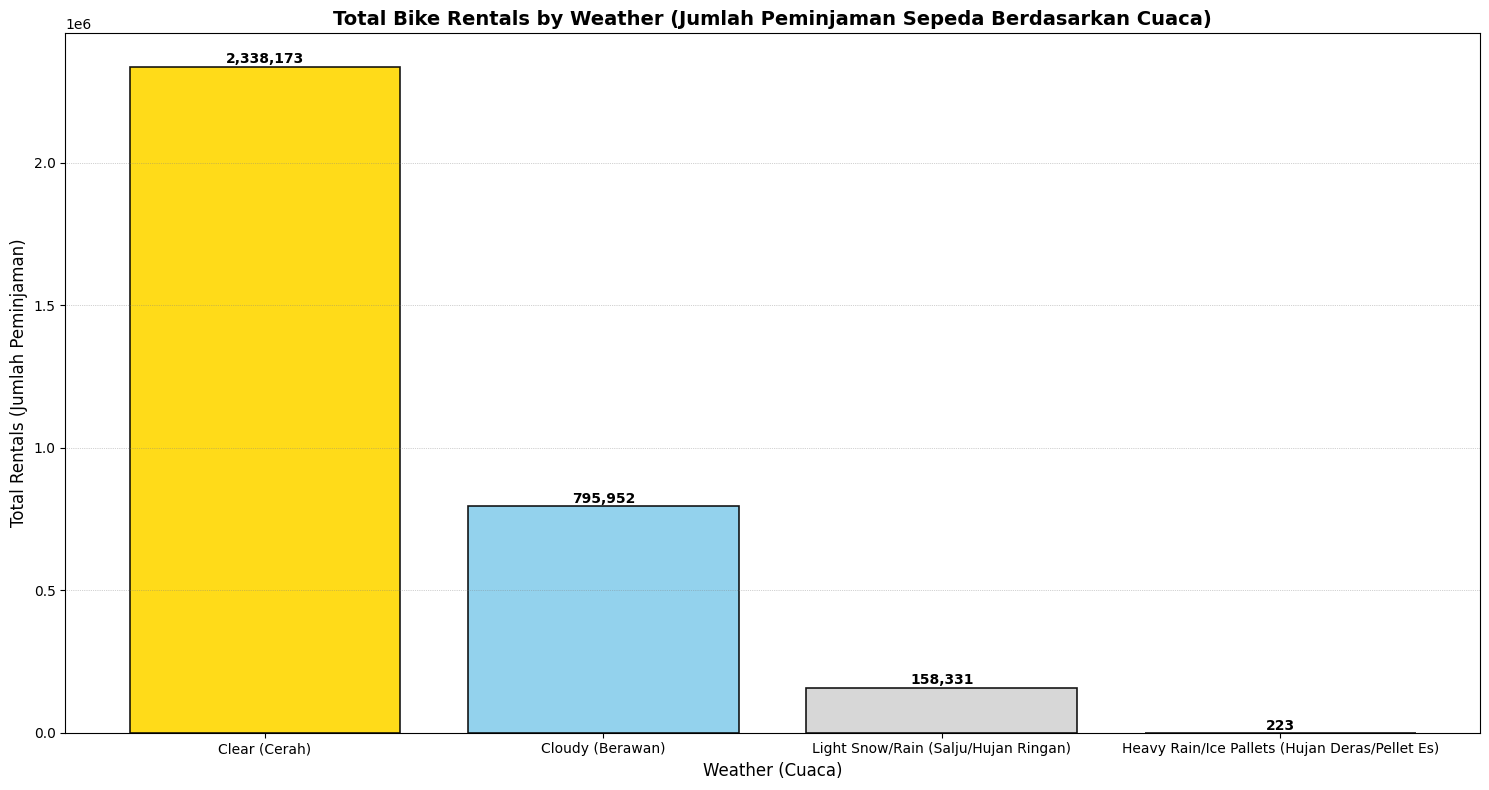

In [ ]:
# Menghitung total penyewaan sepeda berdasarkan kondisi cuaca.
weather_counts = main_df.groupby('weathersit').cnt.sum().sort_values(ascending=False)

# Menentukan warna untuk setiap kondisi cuaca.
weather_colors = {
    'Clear': '#FFD700',  # Warna emas untuk cuaca cerah.
    'Cloudy': '#87CEEB',  # Biru langit terang untuk cuaca berawan.
    'Light Snow/Rain': '#D3D3D3',  # Abu-abu muda untuk salju/hujan ringan.
    'Heavy Rain/Ice Pallets': '#00008B'  # Biru tua untuk hujan deras/pellet es.
}

# Menentukan ukuran dan warna berdasarkan kondisi cuaca.
sizes = weather_counts.values
labels = ['Clear (Cerah)', 'Cloudy (Berawan)', 'Light Snow/Rain (Salju/Hujan Ringan)', 'Heavy Rain/Ice Pallets (Hujan Deras/Pellet Es)']

# Membuat list warna cuaca berdasarkan label yang sesuai.
colors_weather = [
    weather_colors['Clear'],
    weather_colors['Cloudy'],
    weather_colors['Light Snow/Rain'],
    weather_colors['Heavy Rain/Ice Pallets']
]

# Membuat bar chart dengan desain yang lebih menarik.
plt.figure(figsize=(15, 8))

bars = plt.bar(
    labels, sizes, color=colors_weather, edgecolor='black', linewidth=1.2, alpha=0.9
)

# Menambahkan label pada sumbu dan judul dengan bahasa Inggris dan Indonesia.
plt.xlabel('Weather (Cuaca)', fontsize=12)
plt.ylabel('Total Rentals (Jumlah Peminjaman)', fontsize=12)
plt.title('Total Bike Rentals by Weather (Jumlah Peminjaman Sepeda Berdasarkan Cuaca)', fontsize=14, fontweight='bold')

# Menambahkan nilai di atas setiap bar.
for bar, value in zip(bars, sizes):
    plt.text(
        bar.get_x() + bar.get_width() / 2, value + 500,
        f'{value:,}', ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

# Menambahkan grid horizontal untuk memperjelas pembacaan nilai.
plt.grid(axis='y', linestyle=':', linewidth=0.5, color='gray', alpha=0.7)

# Menyesuaikan tata letak agar lebih rapi dan teratur.
plt.tight_layout()

# Menampilkan grafik.
plt.show()


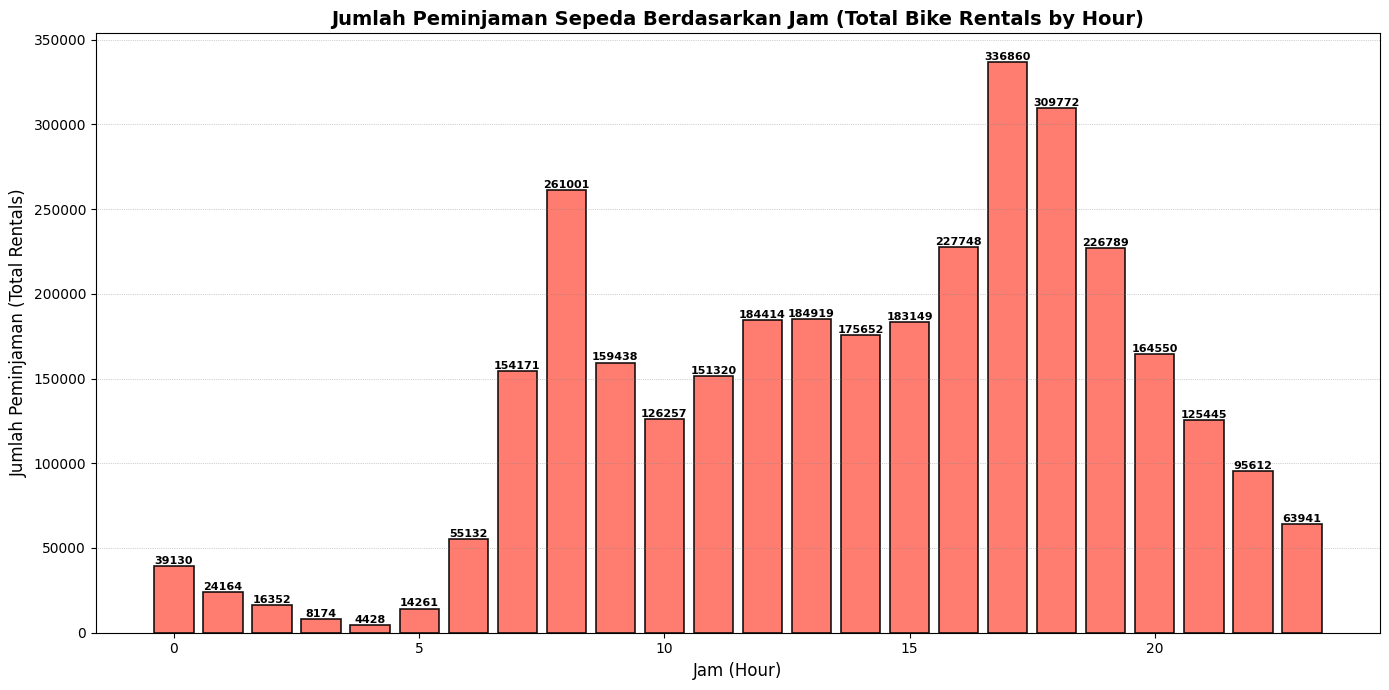

In [ ]:
# Menghitung total peminjaman sepeda berdasarkan jam.
hourly_counts = main_df.groupby('hr')['cnt'].sum()

# Membuat grafik batang dengan desain yang lebih menarik.
plt.figure(figsize=(14, 7))

bars = plt.bar(
    hourly_counts.index, hourly_counts.values, color='#FF6F61', edgecolor='black', linewidth=1.2, alpha=0.9
)

# Menambahkan label pada sumbu dan judul dengan bahasa Indonesia dan terjemahan bahasa Inggris.
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Jam (Total Bike Rentals by Hour)', fontsize=14, fontweight='bold')
plt.xlabel('Jam (Hour)', fontsize=12)
plt.ylabel('Jumlah Peminjaman (Total Rentals)', fontsize=12)

# Menambahkan nilai di atas setiap bar.
for bar, value in zip(bars, hourly_counts.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2, value + 50,
        f'{value}', ha='center', va='bottom', fontsize=8, fontweight='bold'
    )

# Menambahkan grid horizontal untuk memperjelas pembacaan nilai.
plt.grid(axis='y', linestyle=':', linewidth=0.5, color='gray', alpha=0.7)

# Menyesuaikan tata letak agar lebih rapi dan teratur.
plt.tight_layout()

# Menampilkan grafik.
plt.show()


**Insight:**

* Musim gugur dan musim panas tercatat sebagai musim dengan jumlah peminjam sepeda tertinggi.
* Sebanyak lebih dari 2 juta peminjaman sepeda terjadi dalam kondisi cuaca cerah atau sedikit berawan.
* Total peminjaman sepeda pada pukul 5:00 PM dan 6:00 PM masing-masing melebihi 300.000 transaksi sepanjang periode 2011 hingga 2012.

### Analisis Lanjutan Clustering (Optional)

Pada analisis lanjutan ini, dilakukan pengelompokan data (clustering) berdasarkan dua fitur utama, yaitu 'hr' (jam) dan 'weekday' (hari dalam minggu). Proses ini bertujuan untuk menganalisis pola peminjaman sepeda dengan mengamati interaksi antara waktu (jam) dan hari dalam minggu, serta menghitung total jumlah peminjaman ('cnt') untuk setiap kombinasi antara keduanya. Melalui pendekatan ini, kita dapat mengidentifikasi tren dan pola yang muncul dalam data, seperti jam-jam atau hari-hari tertentu yang memiliki tingkat peminjaman yang lebih tinggi. Hasil analisis ini kemudian divisualisasikan dalam bentuk heatmap untuk memberikan gambaran yang lebih jelas dan intuitif mengenai distribusi peminjaman berdasarkan waktu dan hari tanpa melibatkan algoritma machine learning.

In [ ]:
clustering = main_df.groupby(['weekday', 'hr'])['cnt'].sum().unstack()

print(clustering)


hr           0     1     2     3    4     5      6      7      8      9   ...  \
weekday                                                                   ...   
Friday     5453  2571  1325   673  589  2486   9363  26450  48077  26935  ...   
Monday     3571  1800  1021   496  567  2252   8930  25848  42868  22718  ...   
Saturday   9902  7117  5302  2403  804   854   2205   4826  12020  19613  ...   
Sunday     9775  8053  6286  3239  955   852   1493   3476   8805  16437  ...   
Thursday   4045  1774   934   497  528  2669  11066  31388  50323  24810  ...   
Tuesday    2790  1254   687   382  508  2470  10863  30569  48122  24118  ...   
Wednesday  3594  1595   797   484  477  2678  11212  31614  50786  24807  ...   

hr            14     15     16     17     18     19     20     21     22  \
weekday                                                                    
Friday     23854  26256  34423  51211  43783  31415  22186  17667  15295   
Monday     20041  21046  29583  52249  500

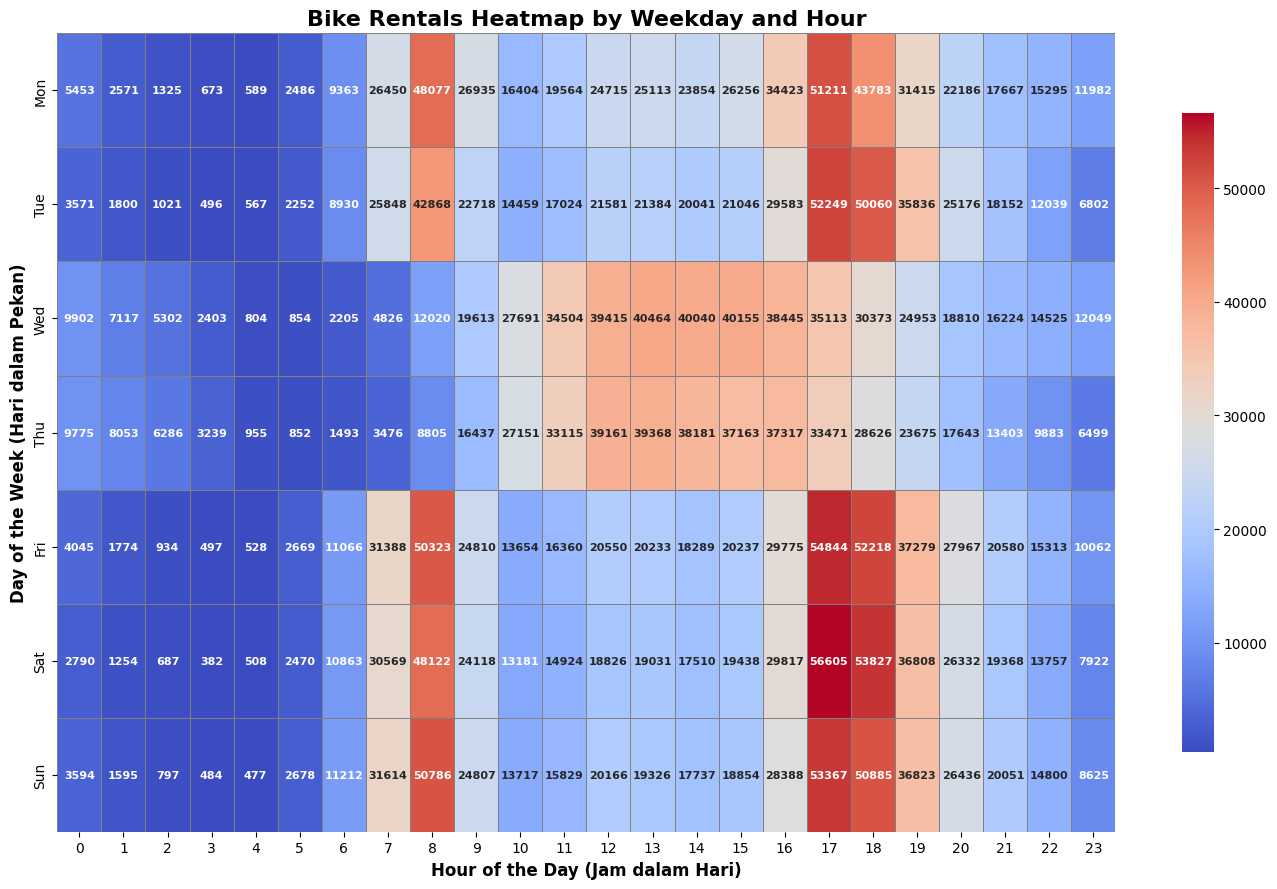

In [ ]:
# Clustering: Mengelompokkan data berdasarkan 'weekday' dan 'hr', kemudian menjumlahkan 'cnt' untuk setiap kombinasi
clustering = main_df.groupby(['weekday', 'hr'])['cnt'].sum().unstack()

# Mengatur ukuran dan desain figure
plt.figure(figsize=(14, 9))

# Membuat heatmap dengan style yang lebih menarik
sns.heatmap(clustering,
            cmap="coolwarm",           # Palet warna yang lebih mencolok
            annot=True,                # Menambahkan angka untuk setiap sel
            fmt=".0f",                 # Format angka tanpa desimal
            linewidths=0.5,            # Garis pemisah antar sel
            linecolor='gray',          # Warna garis pemisah
            cbar_kws={"shrink": 0.8},  # Menyesuaikan ukuran color bar
            annot_kws={"size": 8, "weight": 'bold'},  # Ukuran dan ketebalan angka
            xticklabels=clustering.columns,  # Label sumbu X (Jam)
            yticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Label sumbu Y (Hari)

# Menambahkan judul dan label sumbu dengan font yang lebih besar dan tebal
plt.title('Bike Rentals Heatmap by Weekday and Hour', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day (Jam dalam Hari)', fontsize=12, fontweight='bold')
plt.ylabel('Day of the Week (Hari dalam Pekan)', fontsize=12, fontweight='bold')

# Menambahkan grid untuk memperjelas visualisasi
plt.grid(False)

# Menampilkan grafik
plt.tight_layout()
plt.show()


**Insight:**

* Jumlah peminjam sepeda mengalami peningkatan pada pukul 8:00 AM serta pukul 5:00 PM dan 6:00 PM pada hari Senin hingga Jumat.
* Pada hari Sabtu dan Minggu, peminjaman sepeda cenderung meningkat pada rentang waktu siang hari, yaitu antara pukul 12:00 PM hingga 3:00 PM.

## Conclusion

Berdasarkan proses analisis data yang dilakukan menggunakan dataset Bike-Sharing atau Bisnis Peminjaman Sepeda ini dengan beberapa pertanyaan bisnis yang telah disebutkan diawal, dapat disimpulkan sebagai berikut.

1. Peminjaman sepeda menunjukkan peningkatan signifikan pada kuartal pertama dan kedua tahun 2011, diikuti penurunan bertahap hingga akhir tahun. Pada 2012, terjadi kenaikan signifikan hingga kuartal ketiga, sebelum menurun pada kuartal keempat. Secara keseluruhan, tren peminjaman sepeda menunjukkan kecenderungan positif.

2.  Peminjaman sepeda didominasi oleh pelanggan terdaftar, yang mencakup 81,2%, sementara pelanggan kasual hanya 18,8%. Artinya, jumlah peminjam sepeda yang sudah terdaftar jauh lebih banyak dibandingkan peminjam biasa. Hal ini menunjukkan pemasaran bisnis ini perlu diperluas untuk menarik perhatian peminjam baru dan tidak hanya pelanggan yang terdaftar saja.

3. Berikut adalah kondisi dan situasi yang mencatatkan jumlah peminjaman sepeda tertinggi:
 - Musim Gugur mencatatkan jumlah peminjaman sepeda terbanyak dibandingkan dengan musim lainnya.
 - Cuaca cerah serta sedikit berawan menunjukkan tingkat peminjaman tertinggi.
 - Puncak peminjaman sepeda terjadi pada rentang waktu antara pukul 5 hingga 6 sore serta pukul 8 pagi.
 - Aktivitas peminjaman sepeda lebih tinggi pada hari kerja (Senin hingga Jumat), sedangkan pada akhir pekan (Sabtu dan Minggu), puncaknya terjadi pada periode tengah hari hingga sore, antara pukul 12 hingga 3.



In [ ]:
# Menyimpan dataframe 'main_df' dalam bentuk csv untuk dashboard nantinya

main_df.to_csv("drive/MyDrive/proyekAnalisisDataAzri/dashboard/main_data.csv", index=False)